In [7]:
import requests
import re, nltk
import matplotlib.pyplot as plt
import os
import warnings
from nltk.corpus import stopwords
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
warnings.filterwarnings('ignore')

In [31]:
#scarping review using beautifulsoup
product_reviews=[]
for i in range(1,30):
    product=[]
    url='https://www.amazon.in/Samsung-Galaxy-Phantom-Storage-Active/product-reviews/B08LRDHLQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response = requests.get(url)
    soup = bs(response.content,'html.parser')
    reviews= soup.findAll('span',attrs={'class','a-size-base review-text review-text-content'})
    
    
    for i in range(len(reviews)):
        product.append(reviews[i].text)
    product_reviews=product_reviews + product

with open('product_reviews.txt','w',encoding='utf8') as output:
    output.write(str(product_reviews))

In [32]:
product_reviews

['\n\n\n  Your browser does not support HTML5 video.\n\n\n  \xa0Phone is overheating with basic usage (105+)\n\n',
 "\n\n  Amazon mentioned wrong terms condition about bundle offer active 2 smart watch, samsung terms condition are different for redemption. Both terms condition showing different date for redemption Amazon show after activation of 72 hrs date between 15 April to 31 may and smsung date are 25 to 31 may.But I'm not getting smart watch and stuck between Amazon and Samsung.Amazon not taking any responsibility clearly deny.\n\n",
 "\n\n  Good and Nice phone...Moved out from Chinese phones ...back to my Galaxy again...Real and true flagship...Battery life is OK to Good..since it's a single 4800 MAH and it's available for one day..Phone looks decent..Exynos 2100 processor is good and fast enough but it's still not equal to Snapdragon 888 in some areas...I have not come across any heating issue in this phone..Samsung will release optimized software updates in the near future..CA

In [33]:
#join all review in one paragraph
product_rev_string = " ".join(product_reviews)

# remove unwanted symbols
product_rev_string = re.sub("[^A-Za-z" "]+"," ",product_rev_string).lower()
product_rev_string = re.sub("[0-9" "]+"," ",product_rev_string)   

#split word into saprate string
product_reviews_words = product_rev_string.split(" ")


## WordCloud for all

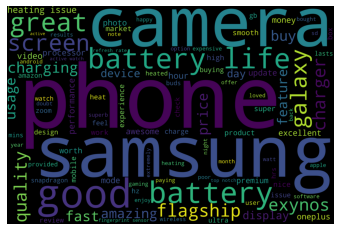

In [38]:
with open("D:/Data Science/Assignment/11Text Mining/stop.txt","r") as sw:
    stopwords = sw.read()
temp = ["this","is","awsome","Data"]
[i for i in temp if i not in "is"]
product_reviews_words = [w for w in product_reviews_words if not w in stopwords]
product_rev_string = " ".join(product_reviews_words)

#creating word cloud for all words
wordcloud_product = WordCloud(background_color='black',width=3000,height=2000,max_words=100).generate(product_rev_string)
plt.axis('off')
plt.imshow(wordcloud_product)

## Wordcloud for positive word

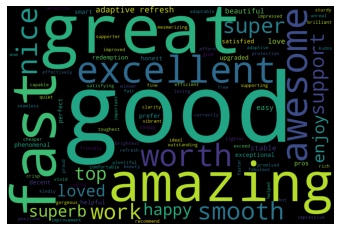

In [36]:
# positive wordcloud
with open("D:/Data Science/Assignment/11Text Mining/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[36:]

product_pos_in_pos = " ".join ([w for w in product_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(background_color='black',width=3000,height=2000).generate(product_pos_in_pos)
plt.axis('off')
plt.imshow(wordcloud_pos_in_pos)

#here we get wordcloud of all postive words in reviews

## Wordcloud for all negative word

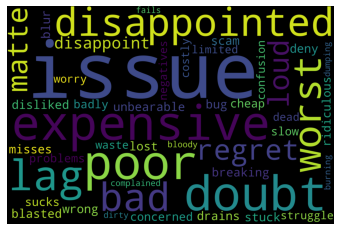

In [37]:
# negative word cloud
with open("D:/Data Science/Assignment/11Text Mining/negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    negwords = negwords[37:]

product_neg_in_neg = " ".join ([w for w in product_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(background_color='black',width=3000,height=2000).generate(product_neg_in_neg)
plt.axis('off')
plt.imshow(wordcloud_neg_in_neg)

#here we are getting the most repeated negative Wordcloud